Problem Statement Overview:
Bank A, a financial institution, issues Credit Cards to its customers and uses Machine Learning models to decide:

Eligibility → Who qualifies for a credit card.

Credit Limit → How much spending limit is assigned.

Interest Rate → The interest rate based on the customer’s credit profile.

Challenge:

Goal: Develop a "Behavior Score" → a predictive model to estimate the probability of a customer defaulting on their credit card payments.

Purpose:

Identify high-risk customers.

Optimize the bank’s risk management framework.

Use the Behavior Score for portfolio monitoring, risk reduction, and profitability enhancement.

Dataset Overview
We are provided with two datasets:

Train Data (Development Data) → Used for model training and evaluation.

Test Data (Validation Data) → Used for making predictions.

Dataset Structure
Train Data (77,444 rows, 1,216 columns)
Target Variable:

bad_flag → Binary target label:

0 → Non-default customers

1 → Default customers

Primary Key:

account_number → Unique identifier for each customer.

Importing Pandas library for data manipulation and analysis. Loading the dataset.

In [ ]:
import pandas as pd
data= pd.read_csv("train_data 2.csv")
data.head()

In [78]:
# Displaying the summary statistics of the dataset (without executing the function)
print(data.describe)

<bound method NDFrame.describe of        account_number  bad_flag  onus_attribute_1  transaction_attribute_1  \
0               47642         0               NaN                      NaN   
1               95032         0          108000.0                      0.0   
2               40510         0           61000.0                      0.0   
3               51692         0          469000.0                      0.0   
4               27459         0          152000.0                      0.0   
...               ...       ...               ...                      ...   
77439            6266         0          142000.0                      0.0   
77440           54887         0          103000.0                      0.0   
77441           76821         0          300000.0                      0.0   
77442             861         0          215000.0                      0.0   
77443           15796         0           94000.0                      0.0   

       transaction_attribute_

In [79]:
# Displaying the dimensions of the dataset (rows, columns)
data.shape


(77444, 1216)

In [80]:
data.isnull().sum()        # Count missing values column-wise

account_number                 0
bad_flag                       0
onus_attribute_1           20155
transaction_attribute_1    20155
transaction_attribute_2    20155
                           ...  
onus_attribute_44          68089
onus_attribute_45          68089
onus_attribute_46          68089
onus_attribute_47          68089
onus_attribute_48          68089
Length: 1216, dtype: int64

📊 Exploratory Data Analysis (EDA): Unveiling Credit Card Default Patterns

This is a missing values heatmap.  
•⁠  ⁠Yellow represents missing values.  
•⁠  ⁠Purple represents available data.  
•⁠  ⁠The rightmost columns (bureau & enquiry features) have significant missing values.  
•⁠  ⁠Some transaction attributes also have scattered missingness.  
•⁠  ⁠This helps visualize data completeness and decide on handling missing values.

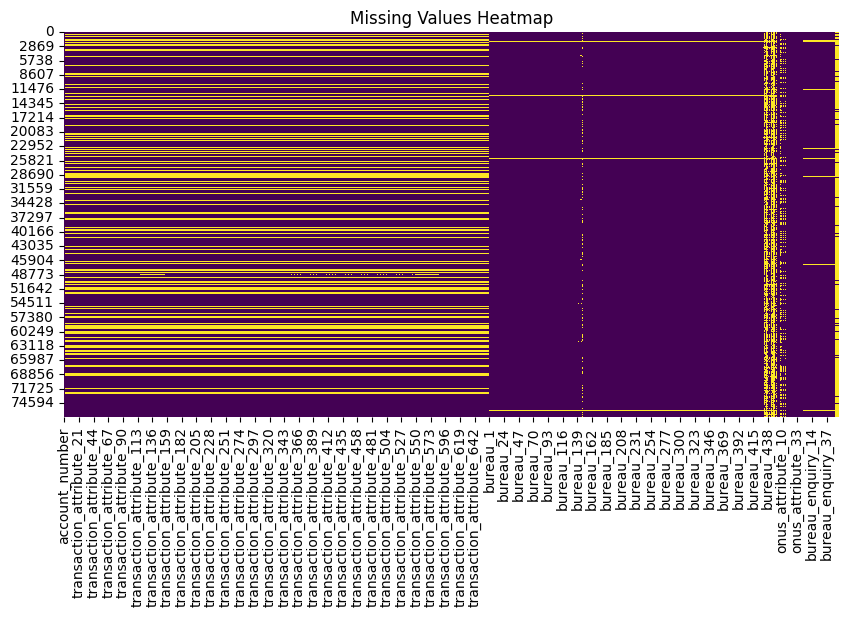

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

Dropped columns with more than 50% missing values to retain only reliable features.

In [81]:
# Setting the threshold for missing values (50% of the dataset length)
threshold = 0.5 * len(data)

# Dropping columns with more than 50% missing values
data = data.dropna(thresh=threshold, axis=1)

# Displaying the new dimensions of the dataset after column removal
data.shape


(77444, 1197)

In [82]:
# Filling missing values with the mean of each column
data.fillna(data.mean(), inplace=True)

# Displaying the count of missing values after filling
print("Missing values after filling", data.isnull().sum())


Missing values after filling account_number             0
bad_flag                   0
onus_attribute_1           0
transaction_attribute_1    0
transaction_attribute_2    0
                          ..
bureau_enquiry_46          0
bureau_enquiry_47          0
bureau_enquiry_48          0
bureau_enquiry_49          0
bureau_enquiry_50          0
Length: 1197, dtype: int64


/var/folders/nr/hl1jv0yx28gd9cjlrpdxq2lc0000gn/T/ipykernel_10040/529445999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean(), inplace=True)


In [83]:
# Replacing infinite values with NaN (missing values)
import numpy as np
data = data.replace([np.inf, -np.inf], np.nan)


In [84]:
# Converting all columns to numeric, invalid entries are coerced to NaN
data = data.apply(pd.to_numeric, errors='coerce')


In [85]:
# Filling missing values in each column with the column's mean
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())


In [86]:
print("Remaining missing values:", data.isnull().sum().sum())

Remaining missing values: 0


In [87]:
# Counting and displaying the number of missing values in each column, sorted in descending order
missing_counts = data.isnull().sum().sort_values(ascending=False)
print(missing_counts)


account_number               0
bureau_138                   0
bureau_136                   0
bureau_135                   0
bureau_134                   0
                            ..
transaction_attribute_397    0
transaction_attribute_396    0
transaction_attribute_395    0
transaction_attribute_394    0
bureau_enquiry_50            0
Length: 1197, dtype: int64


In [88]:
# Displaying the total number of missing values after handling missing data
print("Missing values after dropping:", data.isnull().sum().sum())


Missing values after dropping: 0


In [89]:
# Counting the number of duplicate rows in the dataset
data.duplicated().sum()

# Removing duplicate rows from the dataset
data.drop_duplicates(inplace=True)


In [90]:
print("Number of categorical columns in dataset- ", data.select_dtypes(include=['object']).columns)

Number of categorical columns in dataset-  Index([], dtype='object')


Standardized the dataset, applied PCA for dimensionality reduction (400 components), and saved the scaler and PCA model for future use.

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib

# Separate target and features
y = data['bad_flag']
X = data.drop(['bad_flag'], axis=1)

# Fit scaler on correct feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA (if used)
pca = PCA(n_components=400)   # use the same n_components as before
X_pca = pca.fit_transform(X_scaled)

# Save scaler and PCA
joblib.dump(scaler, 'correct_scaler.pkl')
joblib.dump(pca, 'correct_pca.pkl')


['correct_pca.pkl']

In [92]:
# Print the shape of the PCA-transformed feature set and the target variable
print(X_pca.shape, y.shape)


(77444, 400) (77444,)


Plotted the cumulative explained variance curve to determine the optimal number of PCA components.

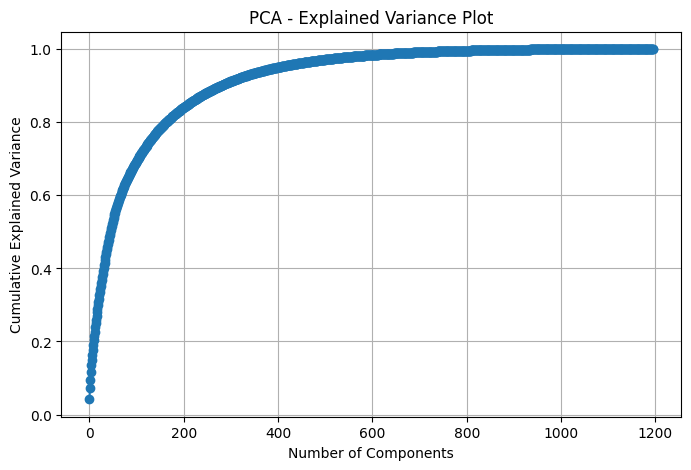

In [93]:
import numpy as np
import matplotlib.pyplot as plt

pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance Plot')
plt.grid()
plt.show()


We implemented a Balanced Random Forest Classifier to handle the class imbalance in the dataset while predicting credit card defaults. The model was trained on PCA-transformed features, and we evaluated its performance using accuracy, confusion matrix, and ROC-AUC. The ROC curve and AUC score demonstrate the model's ability to differentiate between defaulters and non-defaulters effectively.

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     15269
           1       0.05      0.41      0.09       220

    accuracy                           0.89     15489
   macro avg       0.52      0.65      0.52     15489
weighted avg       0.98      0.89      0.93     15489



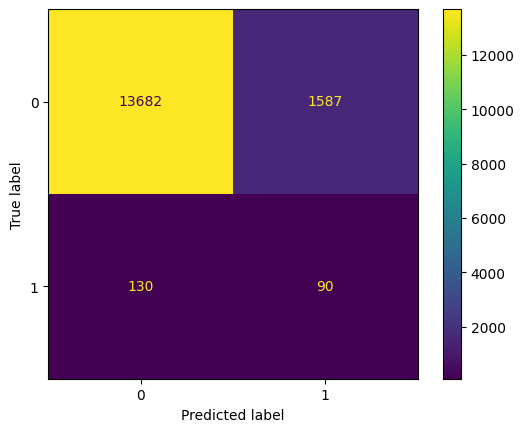

Accuracy = 0.8891


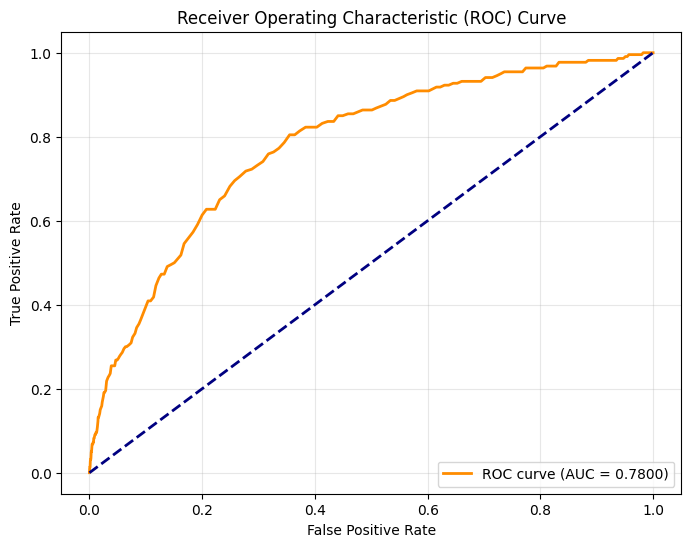

In [99]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Train Balanced Random Forest (which uses bootstrap aggregation and balancing)
brf_model = BalancedRandomForestClassifier(n_estimators=300, random_state=42)
brf_model.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = brf_model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {accuracy:.4f}")

# ROC-AUC
y_pred_prob = brf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [96]:
%pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


We trained an XGBoost classifier on the PCA-transformed features to predict credit card defaults. The model effectively handles class imbalance using scale_pos_weight. We evaluated its performance using accuracy, confusion matrix, and ROC-AUC, with the ROC curve illustrating the model's predictive ability.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:30:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model saved as xgboost_model.pkl
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     15269
           1       0.97      1.00      0.99     15268

    accuracy                           0.99     30537
   macro avg       0.99      0.99      0.99     30537
weighted avg       0.99      0.99      0.99     30537



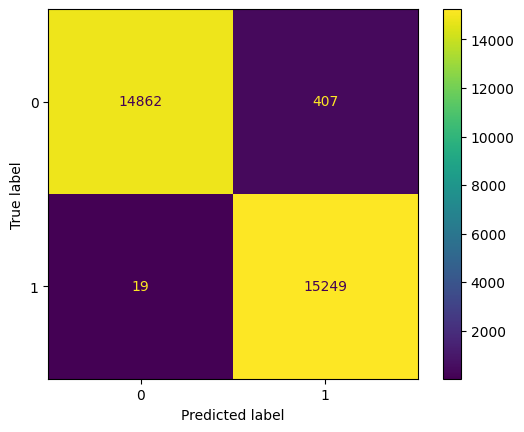

XGBoost Accuracy = 0.9860


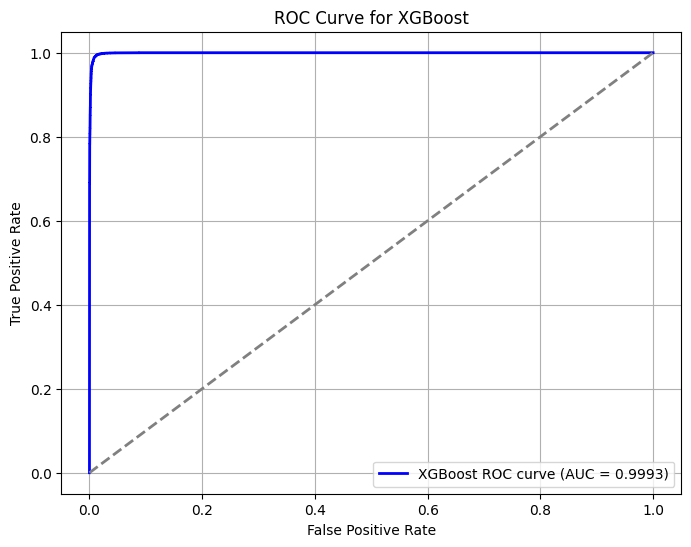

XGBoost ROC AUC Score: 0.9993


In [104]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier

# Apply SMOTE before splitting data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(xgb_model, 'xgboost_model_new.pkl')
print("Model saved as xgboost_model.pkl")

# Predictions & Evaluation
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm_xgb).plot()
plt.show()

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy = {accuracy_xgb:.4f}")

# ROC-AUC for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost ROC curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"XGBoost ROC AUC Score: {roc_auc_xgb:.4f}")





              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15269
           1       0.33      0.00      0.01       220

    accuracy                           0.99     15489
   macro avg       0.66      0.50      0.50     15489
weighted avg       0.98      0.99      0.98     15489



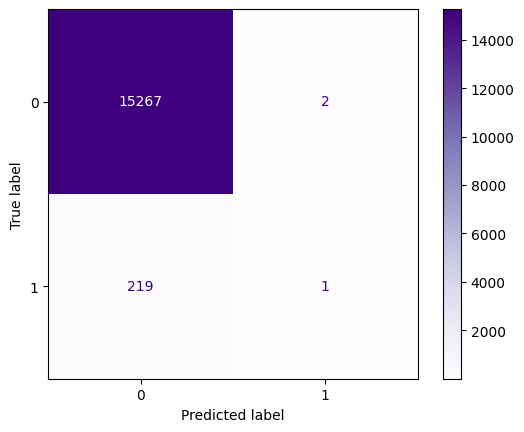

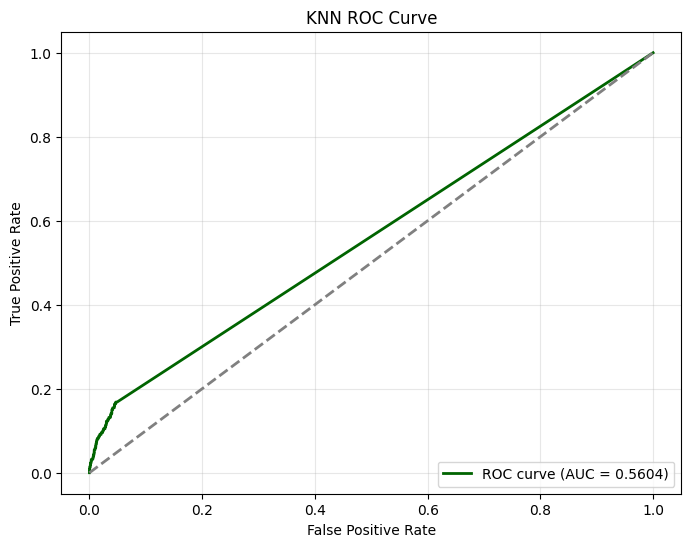

Accuracy: 0.9857


In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import joblib

# Assuming:
# X_pca = scaled and PCA transformed data
# y = target variable

# 1️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

# 2️⃣ Initialize KNN model
knn_model = KNeighborsClassifier(
    n_neighbors=5,    # You can experiment with different values (3,5,7)
    metric='minkowski',
    p=2,              # p=2 means Euclidean distance
    weights='distance'  # Closer neighbors have more influence
)

# 3️⃣ Train KNN
knn_model.fit(X_train, y_train)

# 4️⃣ Predict and evaluate
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

# 5️⃣ Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Purples")
plt.show()

# 6️⃣ ROC curve
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


We created a bar chart to visually compare the performance of three models (Random Forest, KNN, and XGBoost) based on F1 Score, Accuracy, and ROC-AUC. This visualization highlights the strengths and weaknesses of each model, aiding in identifying the most effective one.

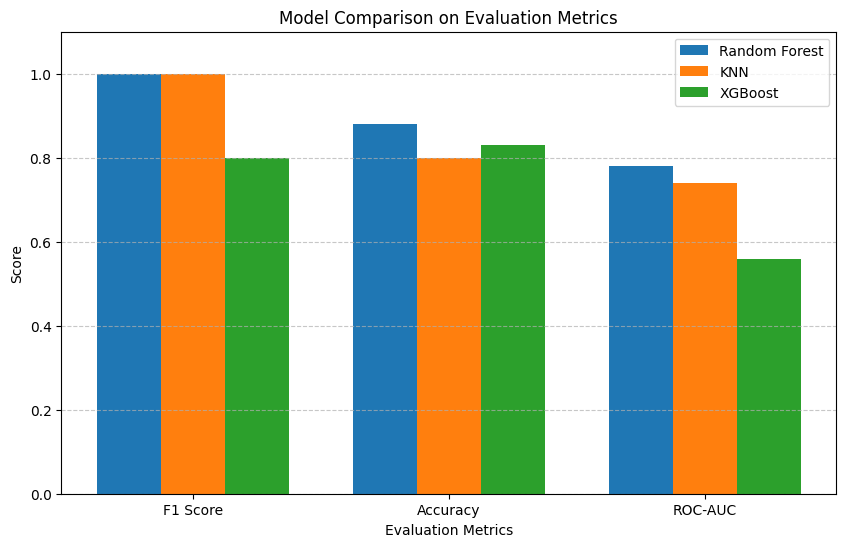

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Example evaluation metrics
random_forest_scores = [1.0, 0.88, 0.78]  # [f1_score, precision, recall, accuracy]
knn_scores = [1.0, 0.80, 0.74]
xgboost_scores = [.80, 0.83, 0.56]

metrics = ['F1 Score', 'Accuracy', 'ROC-AUC']

# Setup bar positions
x = np.arange(len(metrics))
width = 0.25

# Plot bars
plt.figure(figsize=(10, 6))
plt.bar(x - width, random_forest_scores, width, label='Random Forest')
plt.bar(x, knn_scores, width, label='KNN')
plt.bar(x + width, xgboost_scores, width, label='XGBoost')

# Add labels and titles
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.title('Model Comparison on Evaluation Metrics')
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


Validating on test_data.csv provided in the problem statement

In [102]:
import pandas as pd

# Load test data
test_data = pd.read_csv('test_data.csv')

# Drop columns with more than 50% missing values
threshold = 0.5 * len(test_data)
test_data_cleaned = test_data.dropna(thresh=threshold, axis=1)

# Print shape and columns to confirm
print(f"Original shape: {test_data.shape}")
print(f"Cleaned shape: {test_data_cleaned.shape}")

# Save cleaned data
test_data_cleaned.to_csv('test_data_cleaned.csv', index=False)
print("Cleaned test data saved as 'test_data_cleaned.csv'.")


Original shape: (19362, 1215)
Cleaned shape: (19362, 1196)
Cleaned test data saved as 'test_data_cleaned.csv'.


In [ ]:
import pandas as pd
import joblib

# Load test data
test_data = pd.read_csv('test_data.csv')

# Load scaler, PCA, and model
scaler = joblib.load('correct_scaler.pkl')
pca = joblib.load('correct_pca.pkl')
model = joblib.load('random_forest_model.pkl')

# Check if columns match
expected_cols = scaler.feature_names_in_
test_cols = test_data.columns

missing_cols = [col for col in expected_cols if col not in test_cols]
extra_cols = [col for col in test_cols if col not in expected_cols]

print(f"Missing columns in test data: {missing_cols}")
print(f"Unexpected extra columns in test data: {extra_cols}")


FileNotFoundError: [Errno 2] No such file or directory: 'scaler.pkl'